# Image Classification

## Loading Real Image Data

The Cats vs. Dogs dataset inspired by a classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.<br>

### Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Examine the data

In [ ]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ

Downloading...
From (original): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ
From (redirected): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ&confirm=t&uuid=0e20cefa-16be-45da-a921-6d4fd3fb78b3
To: /content/CATS_DOGS.zip
100% 812M/812M [00:10<00:00, 79.6MB/s]


In [ ]:
!unzip -q CATS_DOGS.zip

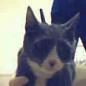

In [ ]:
with Image.open('CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

### Create a list of image filenames

In [ ]:
path = 'CATS_DOGS'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

print('Images: ',len(img_names))

Images:  24994


### Image Preprocessing

### Transformations

(500, 387)


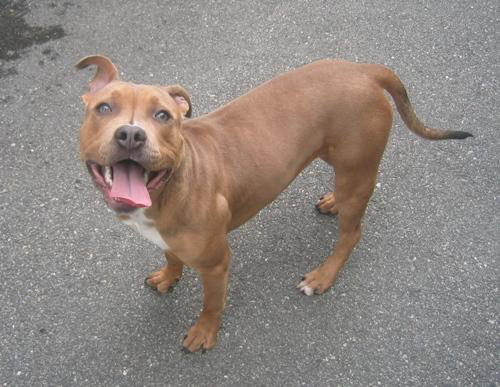

In [ ]:
dog = Image.open('CATS_DOGS/train/DOG/14.jpg')

print(dog.size)
display(dog)

In [ ]:
r, g, b = dog.getpixel((0, 0))
print(r,g,b)

90 95 98


torch.Size([3, 387, 500])


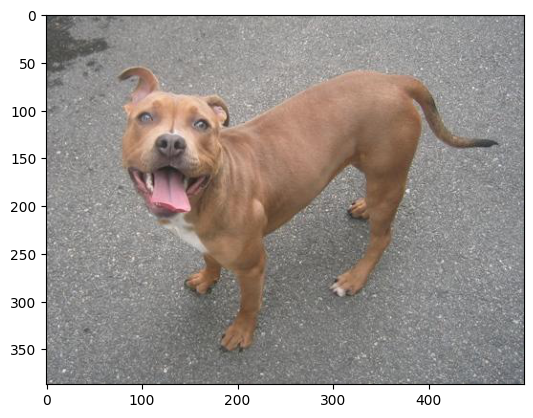

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
im[0,0,0]

tensor(0.3529)

torch.Size([3, 224, 224])


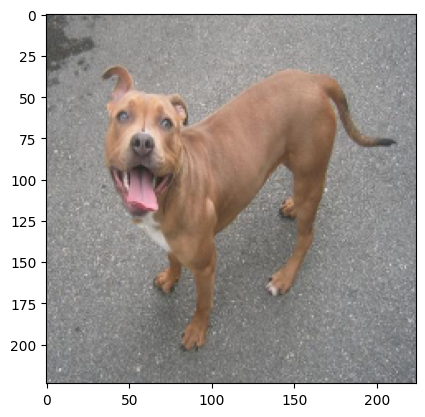

In [ ]:
transform = transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize((224,224)),
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

(135, 102)


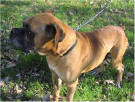

In [ ]:
small_dog = Image.open('CATS_DOGS/train/DOG/11.jpg')

print(small_dog.size)
display(small_dog)

torch.Size([3, 224, 224])


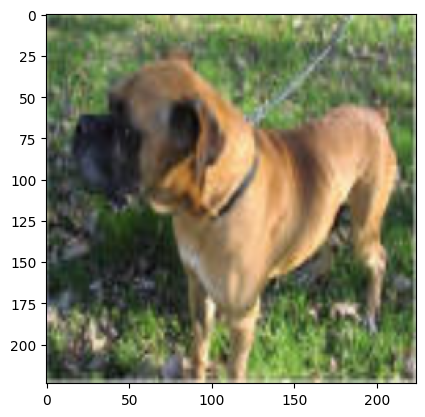

In [ ]:
im = transform(small_dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 224, 224])


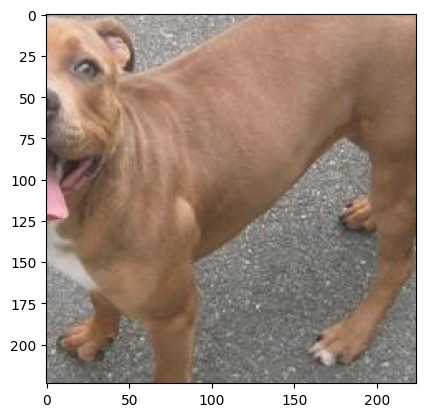

In [ ]:
transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Resize the image first, then crop:

torch.Size([3, 224, 224])


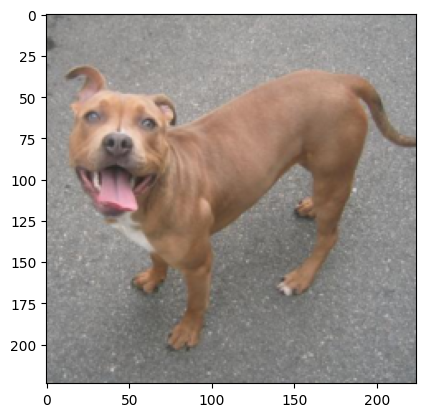

In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 387, 500])


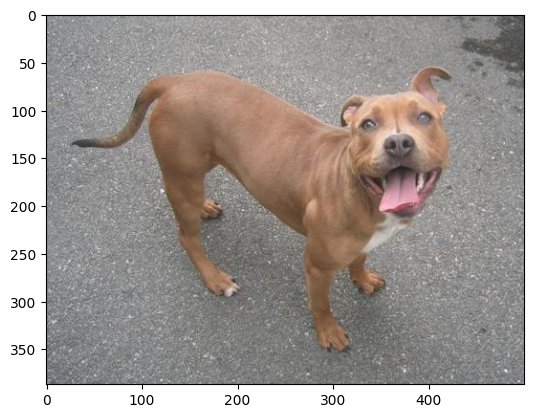

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # default set p=0.5
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 387, 500])


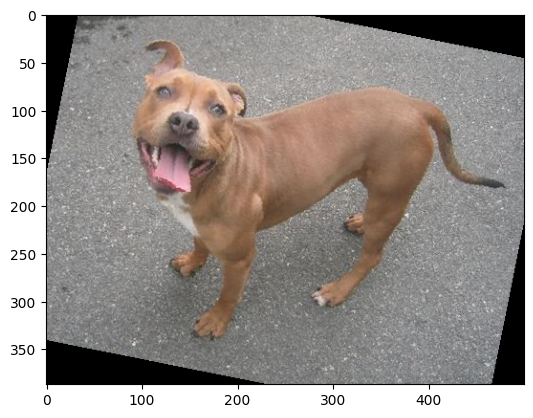

In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(30),  # rotate randomly between +/- 30 degrees
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Scaling is done

torch.Size([3, 224, 224])


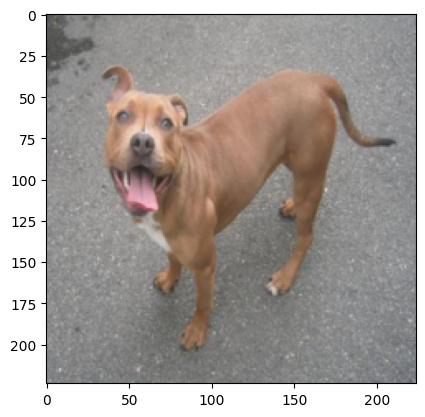

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),  # be sure to pass in a list or a tuple
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Put it all together

torch.Size([3, 224, 224])


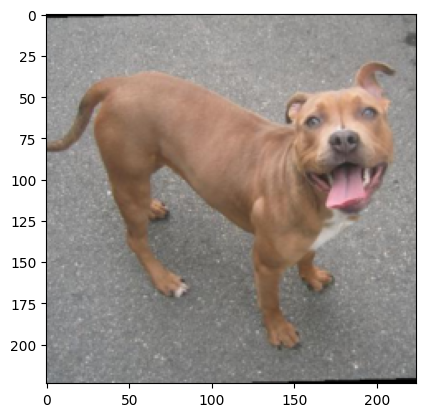

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 387, 500])


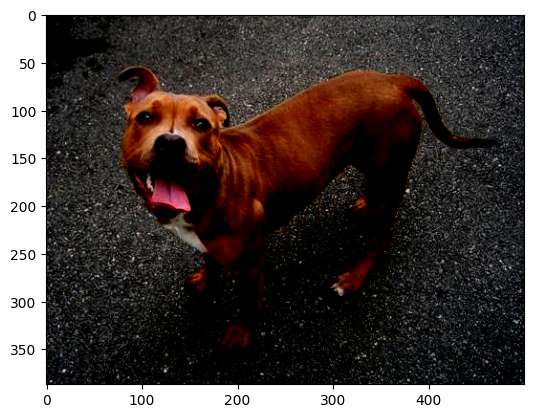

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
(im/2+0.5)[0,0,0]

tensor(0.3529)

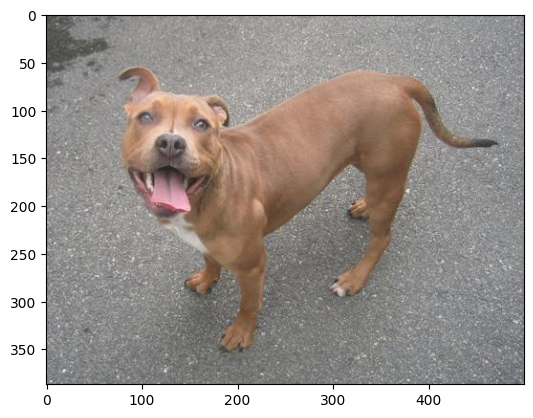

In [ ]:
plt.imshow(np.transpose((im/2+0.5).numpy(), (1, 2, 0)));

In [ ]:
# After normalization:
im[:,0,0]

tensor([-0.2941, -0.2549, -0.2314])

### De-normalize the images

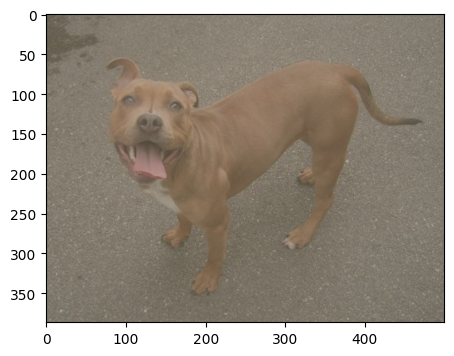

In [ ]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


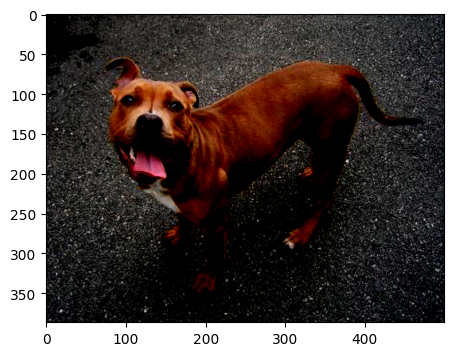

In [ ]:
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample
        img=sample.resize((self.output_size,self.output_size))


        return img


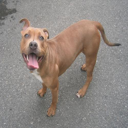

In [ ]:
rescale_transform=Rescale(128)
im_new=rescale_transform(dog)
im_new

## CNN on Custom Images
using a collection of Cats and Dogs images inspired by the classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.



### Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

### Define transforms

In [ ]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

### Prepare train and test sets, loaders

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        # Initializing Captcha Dataset class
        super(CustomDataset, self).__init__()
        self.root=root
        # Listing all files in the provided root directory
        self.cat_files = sorted(os.listdir(root+"/CAT"))
        self.dog_files = sorted(os.listdir(root+"/DOG"))
        # Initializing lists to store images and their respective labels
        self.images = []
        self.labels = []
        self.transform=transform
        self.target_transform=target_transform

        # Iterating through each file in the root directory
        for img in self.cat_files:
            # Checking if the file is an image file
            if self.is_image_file(img):
                label = 0
                # Storing image path and label
                self.images.append(os.path.join(self.root,"CAT", img))
                self.labels.append(label)
        for img in self.dog_files:
            # Checking if the file is an image file
            if self.is_image_file(img):
                label = 1
                # Storing image path and label
                self.images.append(os.path.join(self.root,"DOG", img))
                self.labels.append(label)

    def __len__(self):
        # Returning the total number of images
        return len(self.labels)

    def __getitem__(self, idx:int):
        # Retrieving image and target label based on index
        img, target = self.images[idx], self.labels[idx]

        # Checking if the index is a slice (multiple items requested)
        if isinstance(idx, slice):
            tmp = []
            # Iterating through each image in the slice
            for item in img:
                # Applying transformations if specified
                if self.transform is not None:
                    tmp.append(self.transform(self.read_image(item)))
                else:
                    tmp.append(self.read_image(item))
            img = tmp
        else:
            # Applying transformations if specified
            if self.transform is not None:
                img = self.transform(self.read_image(img))
            else:
                img = self.read_image(img)

        # Applying target transformations if specified

        # Returning image and target label
        return img, target

    # Method to read image from file path
    def read_image(self, path):
        img = Image.open(path)
        # Converting image to RGB format
        return img.convert('RGB')

    # Method to check if a file is an image file
    def is_image_file(self, filename):
        # Checking if filename ends with any of the specified image extensions
        return any(filename.endswith(extension) for extension in [".jpg", ".jpeg", ".png"])

Define the dataset.

In [ ]:
root = r'CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

In [ ]:
train_data[0]

(tensor([[[ 2.0092,  2.0263,  2.0263,  ..., -2.1179, -2.1179, -2.1179],
          [ 2.0092,  2.0263,  2.0263,  ..., -1.1418, -1.1589, -1.1589],
          [ 2.0092,  2.0263,  2.0263,  ...,  2.1462,  2.1290,  2.1290],
          ...,
          [-1.1075, -1.1247, -1.0904,  ..., -1.8953, -1.9295, -1.9638],
          [-1.8953, -1.8953, -1.8953,  ..., -1.9638, -1.9809, -2.0152],
          [-2.1179, -2.1179, -2.1179,  ..., -1.9980, -2.0152, -2.0323]],
 
         [[ 1.4657,  1.4832,  1.4832,  ..., -2.0357, -2.0357, -2.0357],
          [ 1.4657,  1.4832,  1.4832,  ..., -1.1253, -1.1253, -1.1253],
          [ 1.4657,  1.4832,  1.4832,  ...,  1.9734,  1.9559,  1.9559],
          ...,
          [-1.2829, -1.3179, -1.2829,  ..., -1.8256, -1.8606, -1.8957],
          [-1.8606, -1.8782, -1.8606,  ..., -1.8606, -1.8782, -1.9132],
          [-2.0357, -2.0357, -2.0357,  ..., -1.8957, -1.9132, -1.9307]],
 
         [[ 0.2871,  0.3045,  0.3045,  ..., -1.8044, -1.8044, -1.8044],
          [ 0.2871,  0.3045,

Create a dataloader

In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

class_names=["CAT","DOG"]
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

Training images available: 18743
Testing images available:  6251


In [ ]:
b=next(iter(train_loader))

DATALOADER:https://pytorch.org/docs/stable/data.html

### Display a batch of images

Label: [1 0 0 1 0 1 1 0 0 0]
Class: DOG CAT CAT DOG CAT DOG DOG CAT CAT CAT


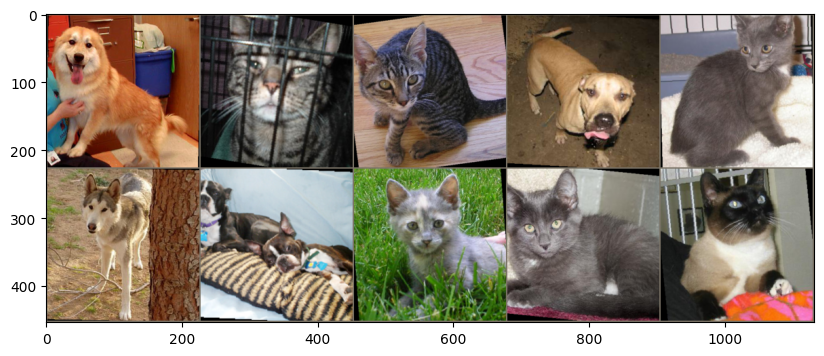

In [ ]:
# Grab the first batch of 10 images
for images,labels in train_loader:
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

### Define the model

In [ ]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()

        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3)  # 3*3*3*6 + 6 = 162 + 6

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)  # 3*3*6*16 + 16 = 864 + 16


        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):

        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
test_model=ConvolutionalNetwork()
sample=torch.randn(10,3,224,224)
res=test_model(sample)
res.sum().backward()

In [ ]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

### Looking at the trainable parameters

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [ ]:
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
     168
       2
________
 5610222


### Train the model

In [ ]:
import time
start_time = time.time()
from tqdm import tqdm
epochs = 3
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

max_trn_batch = 100
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0  # Reset training correct count
    tst_corr = 0  # Reset testing correct count


    total_samples = 0  # Counter for total samples processed in the current epoch
    for b, (X_train, y_train) in enumerate(tqdm(train_loader)):
        X_train = X_train.to(DEVICE)
        y_train = y_train.to(DEVICE)

        # Limit the number of batches
        if b == max_trn_batch:
            break


        y_pred = CNNmodel(X_train)


        loss = criterion(y_pred, y_train)


        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        total_samples += len(y_train)

        #
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if b % 200 == 0:
            accuracy = trn_corr.item() * 100 / total_samples
            print(f'epoch: {i:2}  batch: {b:4} [{total_samples:6}/8000]  loss: {loss.item():10.8f}  \
            accuracy: {accuracy:7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())


    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            X_test = X_test.to(DEVICE)
            y_test = y_test.to(DEVICE)
            if b == max_tst_batch:
                break


            y_val = CNNmodel(X_test)


            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()


    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())

# Print the duration of training
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

  0%|          | 2/1875 [00:03<49:05,  1.57s/it]  

epoch:  0  batch:    0 [    10/8000]  loss: 0.69171149              accuracy:  60.000%


  0%|          | 3/1875 [00:00<03:17,  9.47it/s]

epoch:  1  batch:    0 [    10/8000]  loss: 0.79008687              accuracy:  30.000%


  0%|          | 3/1875 [00:00<03:06, 10.02it/s]

epoch:  2  batch:    0 [    10/8000]  loss: 0.63317239              accuracy:  50.000%


  5%|▌         | 100/1875 [00:07<02:21, 12.54it/s]



Duration: 70 seconds


### Save the trained model

In [ ]:
torch.save(CNNmodel.state_dict(), 'CustomImageCNNModel.pt')

### Evaluate model performance

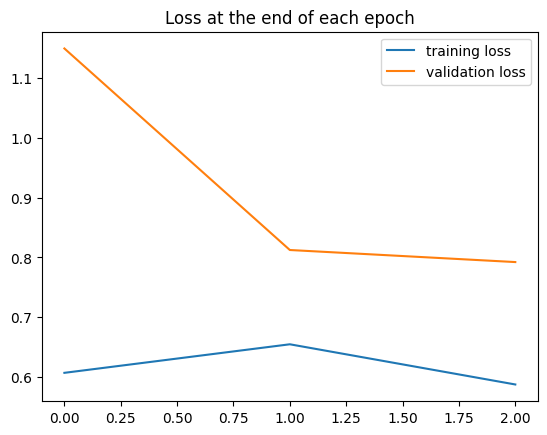

In [ ]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

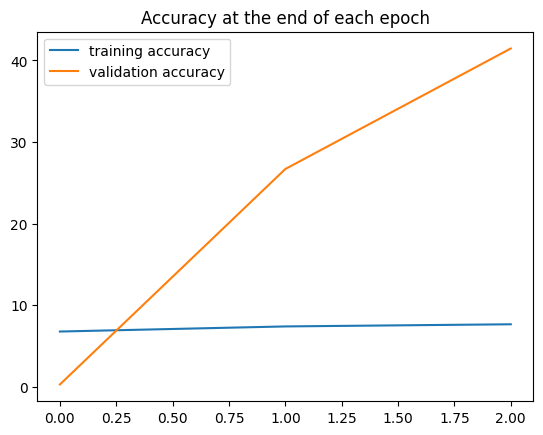

In [ ]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1]*100/3000:.3f}%')

[9, 801, 1244]
Test accuracy: 41.467%


### Download a pretrained model

In [ ]:
AlexNetmodel = models.alexnet(pretrained=True).to(DEVICE)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Freeze feature parameters

In [ ]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

### Modify the classifier

In [ ]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1)).to(DEVICE)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [ ]:
# These are the TRAINABLE parameters:
count_parameters(AlexNetmodel)

 9437184
    1024
    2048
       2
________
 9440258


### Define loss function & optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

### Train the model

In [ ]:
import time
from tqdm import tqdm

start_time = time.time()
epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0


    for b, (X_train, y_train) in enumerate(tqdm(train_loader)):
        if b == max_trn_batch:
            break


        X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)


        optimizer.zero_grad()
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()


        predicted = torch.max(y_pred.data, 1)[1]
        trn_corr += (predicted == y_train).sum()


        if b % 200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10 * (b + 1):6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item() * 100 / (10 * (b + 1)):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())


    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(tqdm(test_loader)):
            if b == max_tst_batch:
                break


            X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)


            y_val = AlexNetmodel(X_test)


            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()


            loss = criterion(y_val, y_test)

    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())

print(f'\nDuration: {time.time() - start_time:.0f} seconds')  # Print the time elapsed


  0%|          | 3/1875 [00:00<03:23,  9.21it/s]

epoch:  0  batch:    0 [    10/8000]  loss: 0.74394500  accuracy:  30.000%


 11%|█         | 203/1875 [00:17<02:24, 11.58it/s]

epoch:  0  batch:  200 [  2010/8000]  loss: 0.41842732  accuracy:  88.507%


 21%|██▏       | 402/1875 [00:40<03:39,  6.71it/s]

epoch:  0  batch:  400 [  4010/8000]  loss: 0.38079438  accuracy:  90.599%


 32%|███▏      | 602/1875 [01:08<03:18,  6.42it/s]

epoch:  0  batch:  600 [  6010/8000]  loss: 0.19847046  accuracy:  91.597%


 48%|████▊     | 300/626 [00:09<00:10, 31.30it/s]


Duration: 105 seconds


In [ ]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1]*100/3000:.3f}%')

[2704]
Test accuracy: 90.133%


### Run a new image through the model

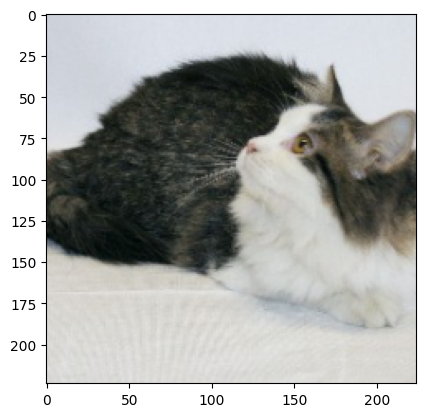

In [ ]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [ ]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224).to(DEVICE)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


In [ ]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224).to(DEVICE)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT
